In [1]:
# importar librerías 
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


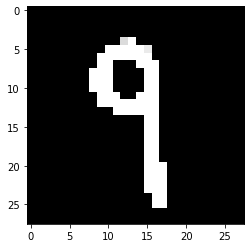

In [3]:
# para las test
i=0
f=0
imagenestest_dataset = []
etiquetastest_dataset = []
while(i<500):

  file = '/content/'+str(i)+'.png'
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )
  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  # Preview de imagen reformateada
  Numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized, cmap='gray')
  if(f==9):
    imagenestest_dataset.append(img_resized)
    etiquetastest_dataset.append(f)
    
    f=0
  else :
    imagenestest_dataset.append(img_resized)
    etiquetastest_dataset.append(f)
   
    f=f+1
  i=i+1
imagenesnetest=np.array(imagenestest_dataset)
newetiquetatest=np.array(etiquetastest_dataset)

In [4]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

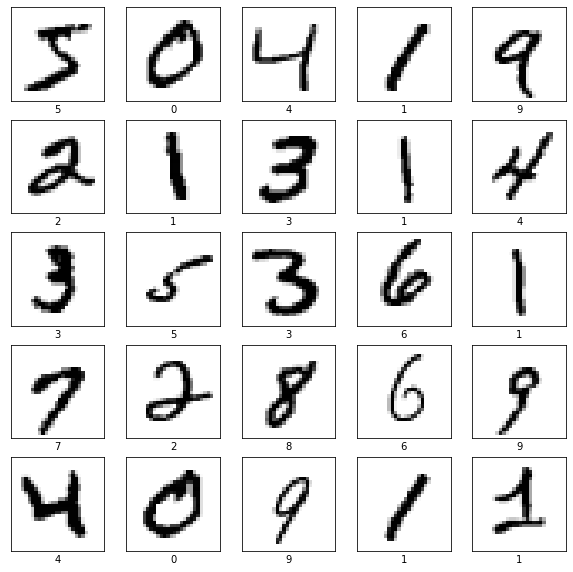

In [5]:
i=0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
imagenesnetest.shape


(500, 28, 28)

In [7]:
newetiquetatest.shape

(500,)

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.5101 - accuracy: 0.8711
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.9126
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2838 - accuracy: 0.9284
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9337
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2281 - accuracy: 0.9415
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2201 - accuracy: 0.9439
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2113 - accuracy: 0.9453
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1981 - accuracy: 0.9499
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1926 - accuracy: 0.9524
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.19

In [13]:
test_loss, test_acc = model.evaluate(imagenesnetest, newetiquetatest, verbose=2)

print('\nTest accuracy:', test_acc)

16/16 - 0s - loss: 7.9700 - accuracy: 0.4220 - 178ms/epoch - 11ms/step

Test accuracy: 0.421999990940094


In [14]:
predictions = model.predict(imagenesnetest)

16/16 [==============================] - 0s 2ms/step


In [15]:
predictions[0]

array([9.96637344e-01, 1.04453975e-13, 1.97623554e-03, 2.21560569e-07,
       1.74528122e-05, 2.65962481e-05, 1.16070360e-03, 8.15298972e-06,
       5.64092261e-05, 1.16907271e-04], dtype=float32)

In [16]:
np.argmax(predictions[0])

0

In [17]:
newetiquetatest[0]

0

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

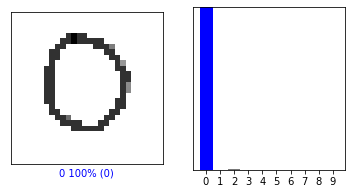

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetatest)
plt.show()

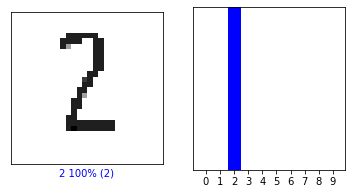

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetatest)
plt.show()

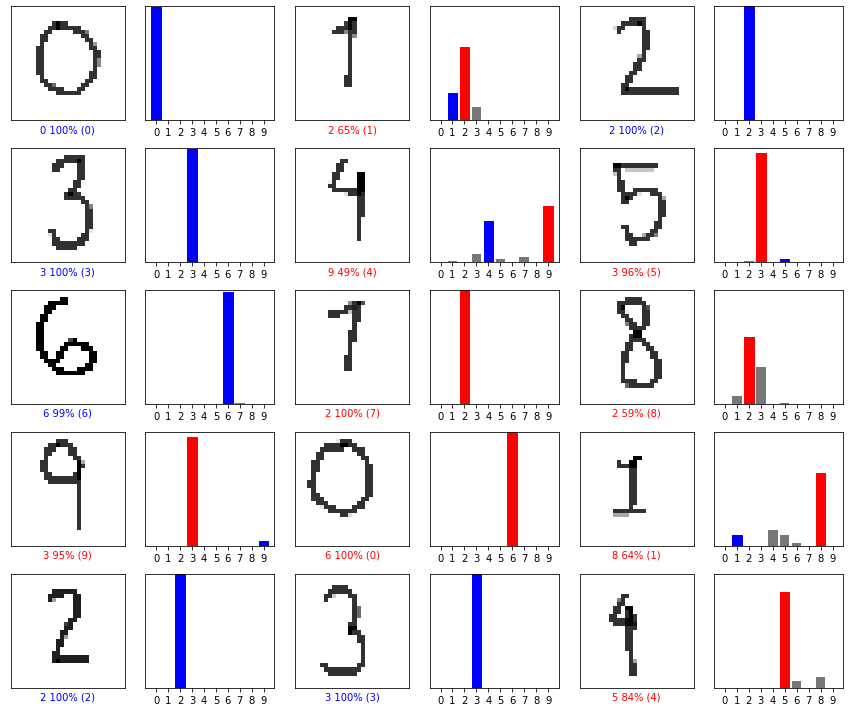

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], newetiquetatest)
plt.tight_layout()
plt.show()

In [22]:
img = imagenesnetest[1]

print(img.shape)

(28, 28)


In [23]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.0430030e-05 2.3992811e-01 6.4530617e-01 1.1458031e-01 6.0070637e-19
  8.7261797e-05 7.0357091e-05 1.0803955e-12 1.7308717e-05 9.2181756e-09]]


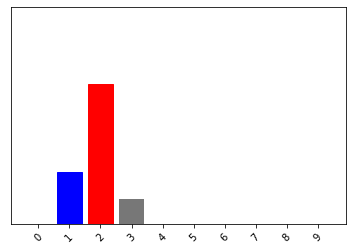

In [25]:
plot_value_array(1, predictions_single[0], newetiquetatest)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

2